# tm : Text Mining
install.packages("tm")

# 단어들을 꾸러미 시키는 패키지 
install.packages("SnowballC")

# Word Cloud 
install.packages("wordcloud")

In [1]:
library(tm)
library(SnowballC)
library(wordcloud)
library(RColorBrewer)





Loading required package: NLP
Loading required package: RColorBrewer


In [15]:
# 데이터 불러오기
text <- readLines("../Data/Trumph.txt")





In [16]:
# Vector로 변환
docs <- Corpus(VectorSource(text))





In [17]:
# 결과확인
inspect(docs)





<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 9

[1] I feel that Kim Jong Un wants to do something great for his people, And he has that opportunity, and he won't have that opportunity again.                                                                                                                                                   
[2] I think within the first minute I'll know, So far so good.                                                                                                                                                                                                                                   
[3] We're going to have to see what happens.                                                                                                                                                                                                                                                     
[4] At a minimum, I do believe

In [18]:
# 문자제거
toSpace <- content_transformer(function(x,pattern) gsub(pattern,'',x))
docs <- tm_map(docs,toSpace,'/')
docs <- tm_map(docs,toSpace,'@')                               
docs <- tm_map(docs,toSpace,'\\|')  





Warning message in tm_map.SimpleCorpus(docs, toSpace, "/"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, toSpace, "@"):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, toSpace, "\\|"):
“transformation drops documents”

In [19]:
# 사용할 수 있는 기능들
# convert to text 소문자로
docs <- tm_map(docs, content_transformer(tolower))

# 숫자제거
docs <- tm_map(docs, removeNumbers)

# 불용어 제거
docs <- tm_map(docs, removeWords, stopwords("english"))

# ???
docs <- tm_map(docs, removeWords, c("ㅋㅋㅋ","넘흐"))

# 구두점 기호
docs <- tm_map(docs, removePunctuation)

# 여백 제거
docs <- tm_map(docs, stripWhitespace)

#Text Stemming - 형태소 처리 (과거형, 현재형)
# docs <- tm_map(docs, stemDocument)













Warning message in tm_map.SimpleCorpus(docs, content_transformer(tolower)):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeNumbers):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeWords, stopwords("english")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removeWords, c("ㅋㅋㅋ", "넘흐")):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, removePunctuation):
“transformation drops documents”Warning message in tm_map.SimpleCorpus(docs, stripWhitespace):
“transformation drops documents”

In [20]:
inspect(docs)





<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 9

[1]  feel kim jong un wants something great people opportunity opportunity                                                                                                           
[2]  think within first minute know far good                                                                                                                                         
[3]  going see happens                                                                                                                                                               
[4]  minimum believe least met hopefully will liked                                                                                                                                  
[5]  way singapore chance achieve truly wonderful result north korea world                                                                                                  

In [21]:
# count 하고 정렬하기
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m), decreasing = T)
d <- data.frame(word = names(v), freq = v)
head(d)





,word,freq
will,will,5
something,something,4
great,great,3
kim,kim,3
opportunity,opportunity,3
know,know,3


In [22]:
# 더미 테이블이 형성됨
wordcount <- table(d)
wordcount





             freq
word          1 2 3 4 5
  achieve     1 0 0 0 0
  believe     1 0 0 0 0
  believes    1 0 0 0 0
  certainly   1 0 0 0 0
  chance      1 0 0 0 0
  create      1 0 0 0 0
  day         1 0 0 0 0
  done        1 0 0 0 0
  exciting    1 0 0 0 0
  far         1 0 0 0 0
  feel        1 0 0 0 0
  feeling     1 0 0 0 0
  first       1 0 0 0 0
  forward     1 0 0 0 0
  going       0 1 0 0 0
  good        1 0 0 0 0
  great       0 0 1 0 0
  happen      0 1 0 0 0
  happens     1 0 0 0 0
  hard        1 0 0 0 0
  hopefully   1 0 0 0 0
  jong        0 1 0 0 0
  jongun      1 0 0 0 0
  kim         0 0 1 0 0
  know        0 0 1 0 0
  korea       1 0 0 0 0
  land        1 0 0 0 0
  least       1 0 0 0 0
  life        1 0 0 0 0
  liked       1 0 0 0 0
  look        1 0 0 0 0
  meeting     1 0 0 0 0
  met         1 0 0 0 0
  minimum     1 0 0 0 0
  minute      1 0 0 0 0
  north       1 0 0 0 0
  onetime     1 0 0 0 0
  opinion     1 0 0 0 0
  opportunity 0 0 1 0 0
  peace       1 0 0 0 

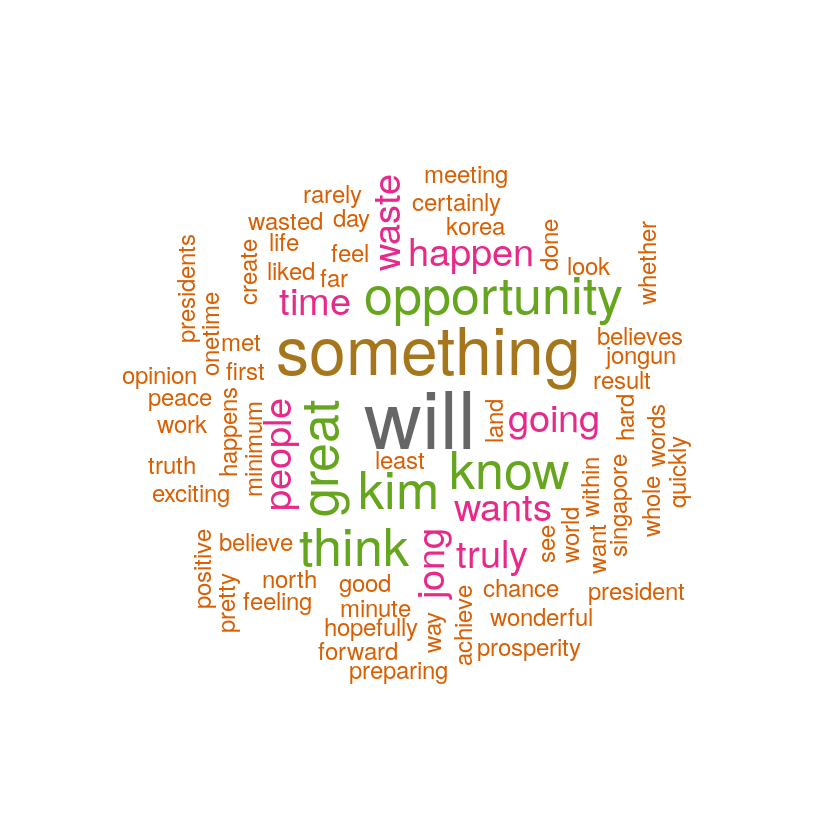

In [23]:
# 옵션설명
# max.words = 100 : 최대 단어 100개 보여줘
# min.freq = 1 : 최소한 1번 이상 나온다.
# random.order = F : 제일 많이 나온 단어가 먼저 나오도록 한다.(센터에)
# rot.per = 단어들 중 세로로 나오는 단어의 비율
# colors : 지정 안하면 검은색 글씨만 출력
palete <- brewer.pal(8,"Dark2")
wordcloud(word = d$word,
          freq = d$freq,
          min.freq = 1,
          max.words = 100,
          random.order = F,
          rot.per = 0.35,
          color = palete
)







